# Optimal Execution of Trades in the FX Market

In [1]:
from optexec import dataloader, execution, misc

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

sns.set(rc = {"figure.figsize":(16, 9)})

In [3]:
T = 200
W = np.ones(shape = 5, dtype = int) * 500

## TWAP

In [10]:
file1 = 'data/ask.tsv'
file2 = 'data/bid.tsv'
orderbook_bid = dataloader.OnlineData(file2)
orderbook_ask = dataloader.OnlineData(file1)

ACPR = []

T = 200
W = np.array([5000, 2000, 3000]) 
start = 5
num = T - (start - 1)

ELL = np.linspace(start = start, stop = T, num = num, endpoint = True, dtype = int)

for L in tqdm(ELL):

    orderbook_bid = dataloader.OnlineData(file2)
    orderbook_ask = dataloader.OnlineData(file1)
    twap = execution.TWAP(T, L , W)
    ACPR_twap = twap.cumulative_impact(orderbook_bid=orderbook_bid, orderbook_ask=orderbook_ask)*100
    orderbook_ask.close()
    orderbook_bid.close()
    ACPR.append(ACPR_twap)

ACPR_TWAP = np.array(ACPR) 

100%|██████████| 196/196 [00:03<00:00, 54.98it/s]


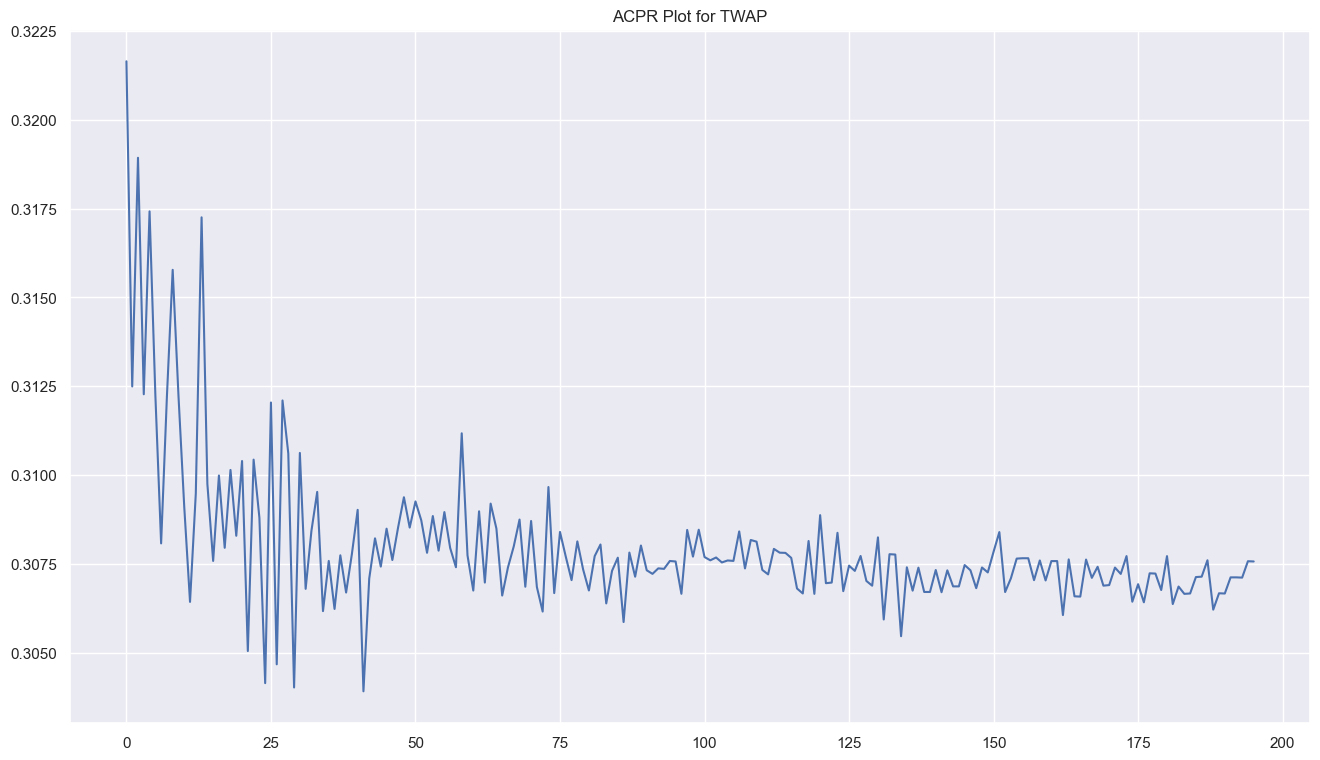

In [13]:
plt.title("ACPR Plot for TWAP")
sns.lineplot(ACPR_TWAP);

## Joint backtest

100%|██████████| 49/49 [00:14<00:00,  3.43it/s]


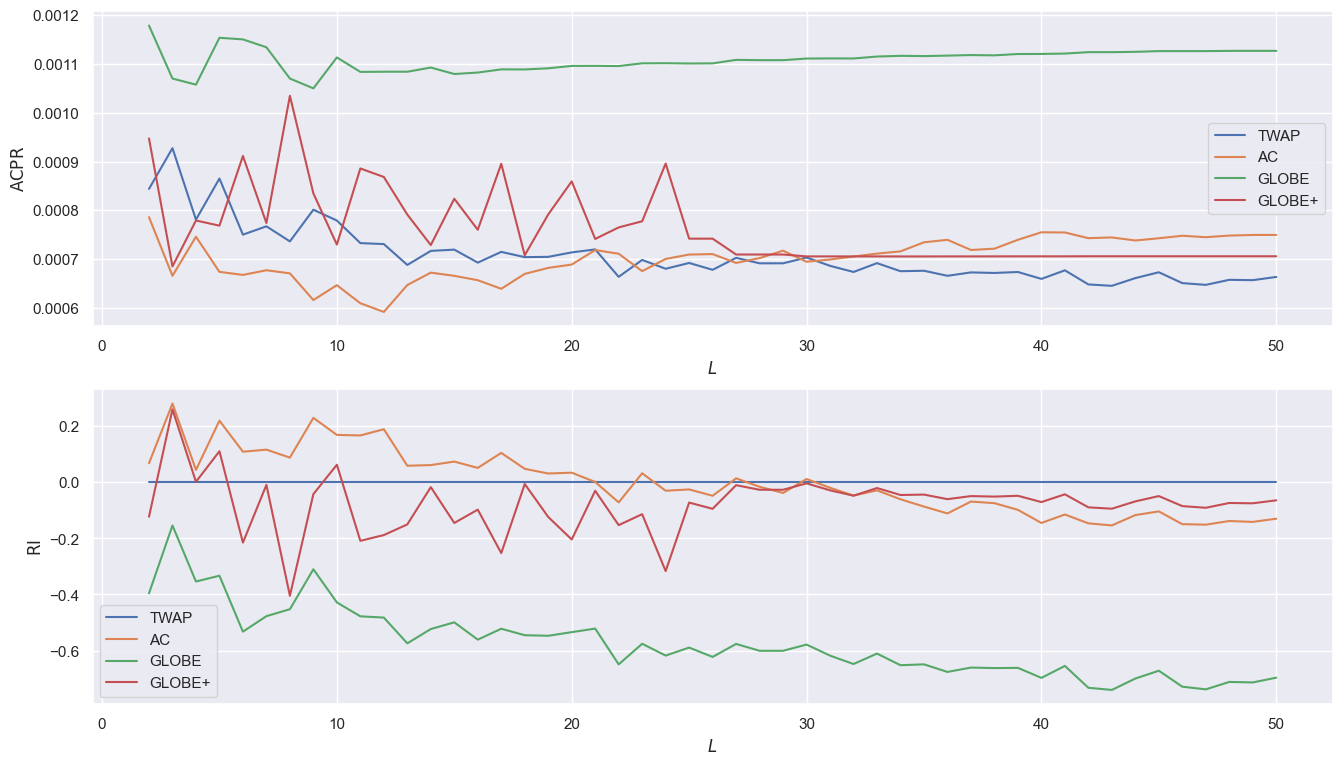

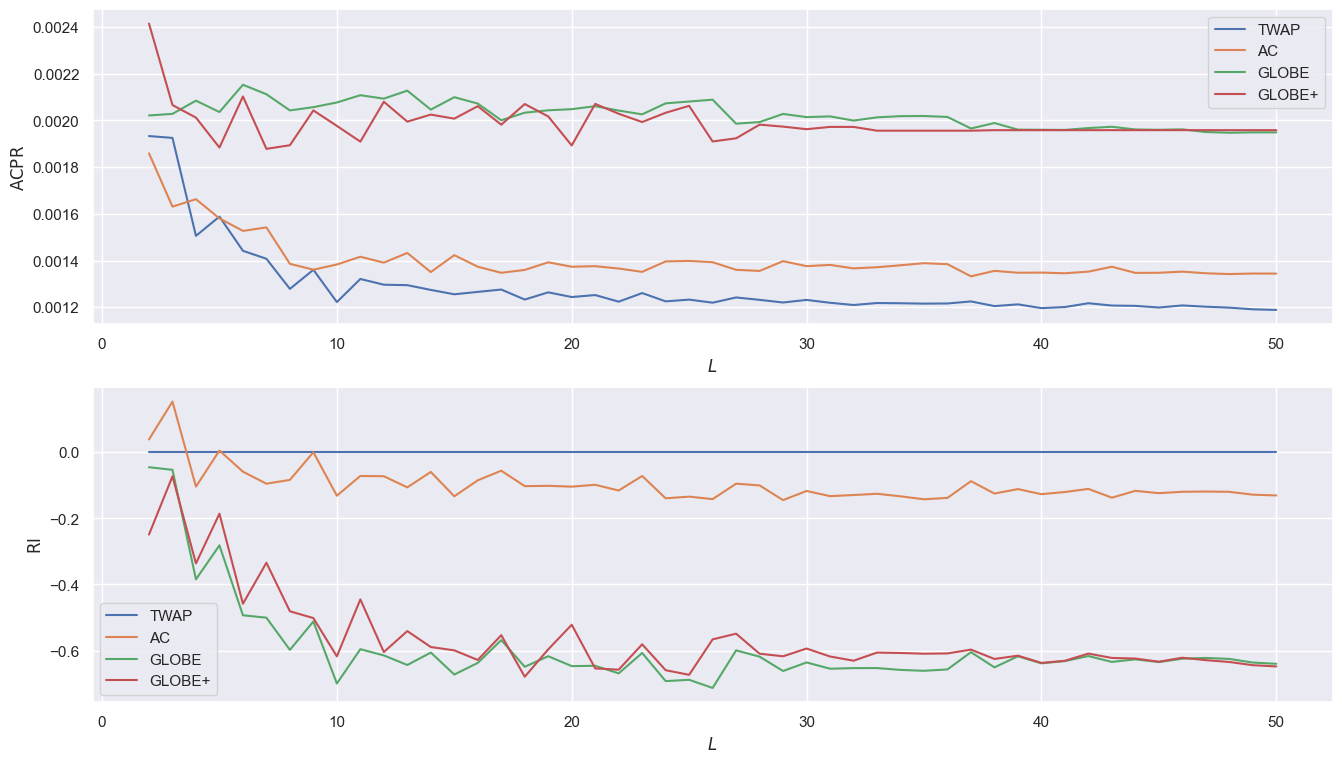

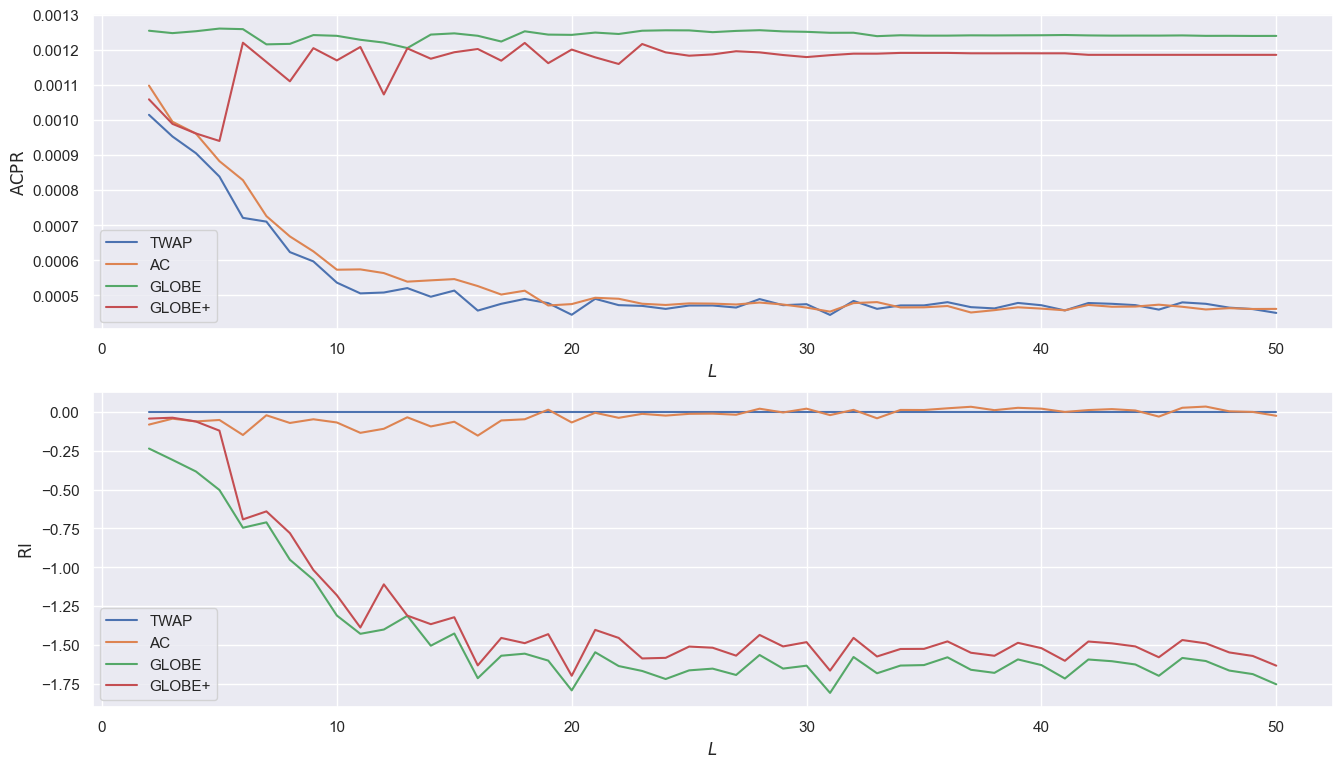

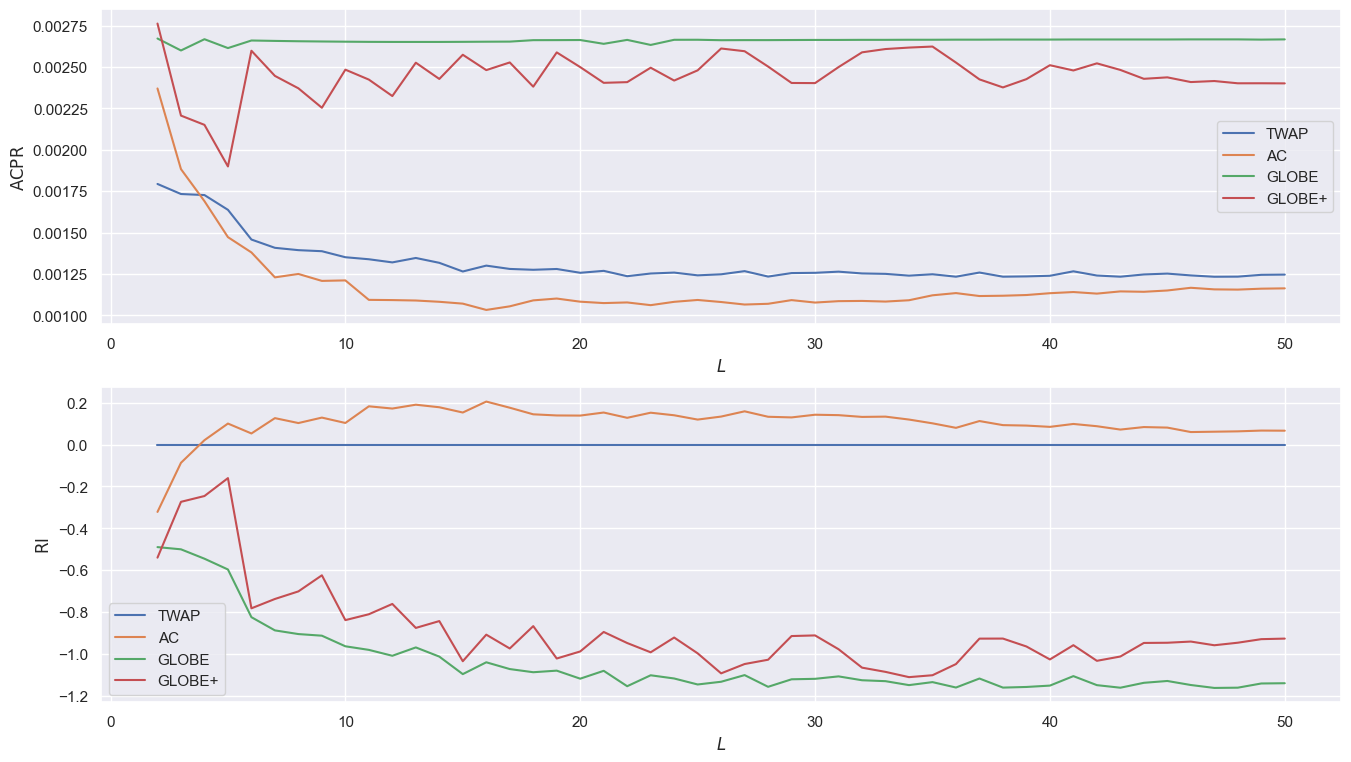

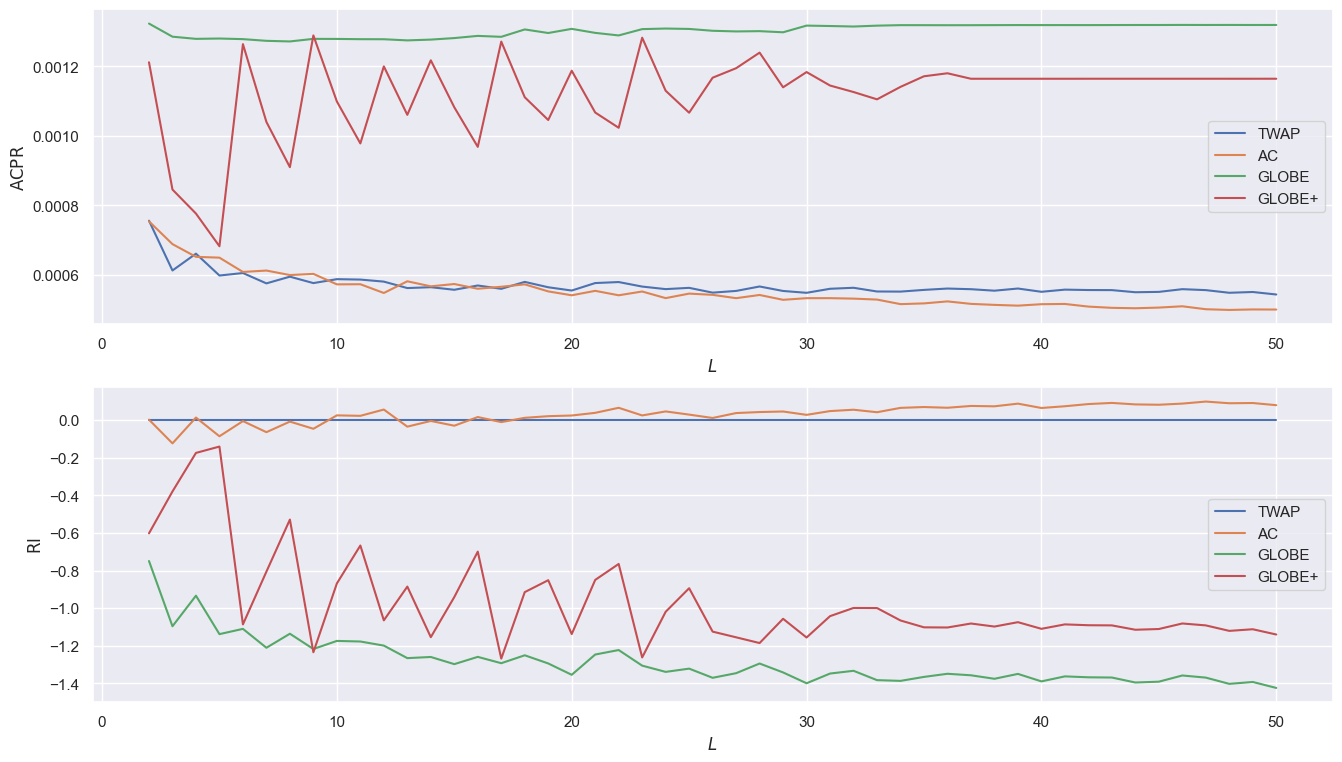

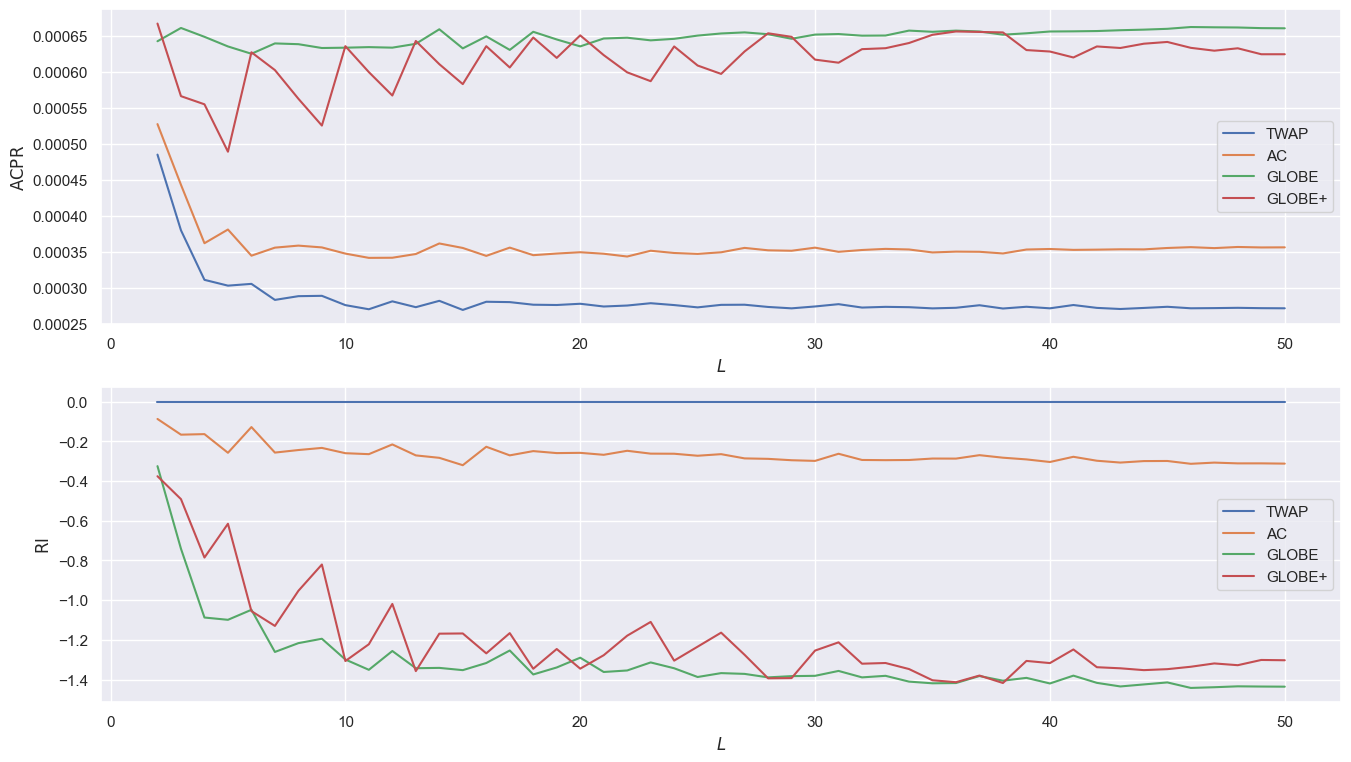

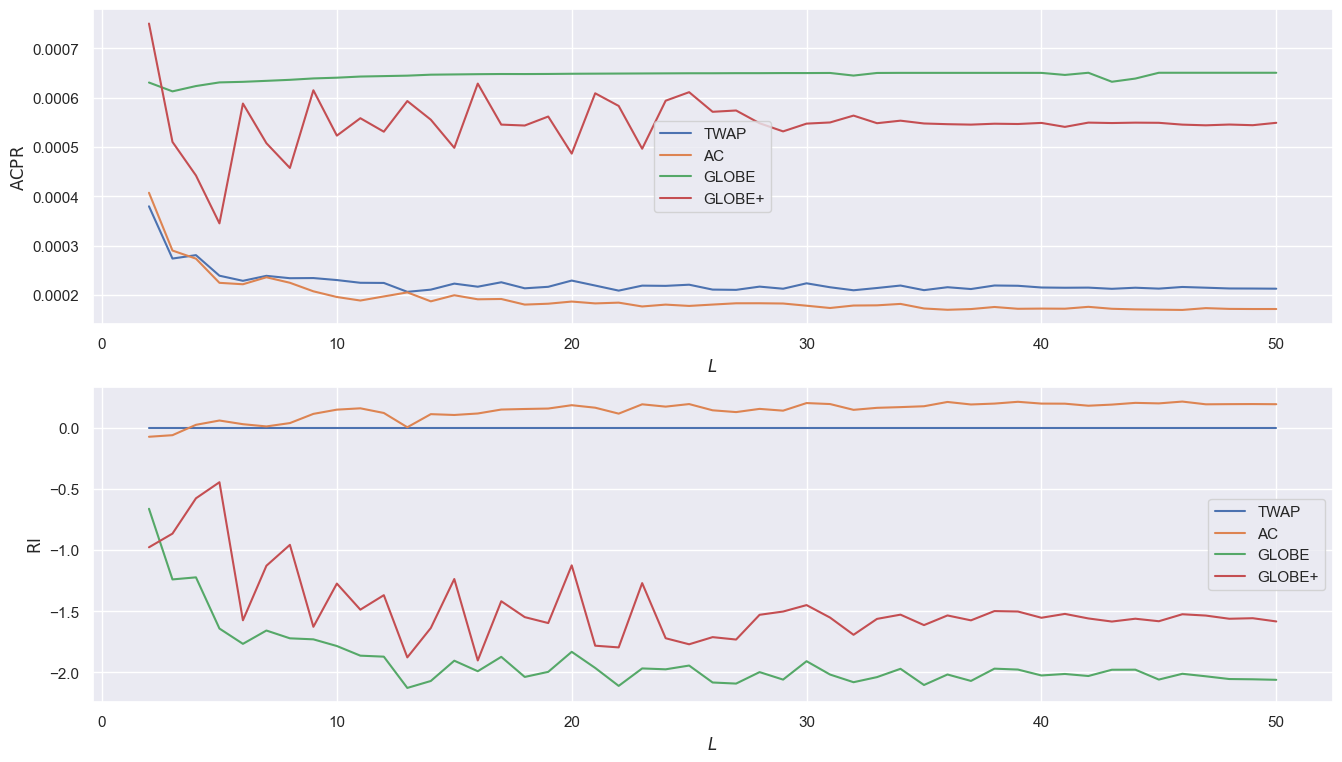

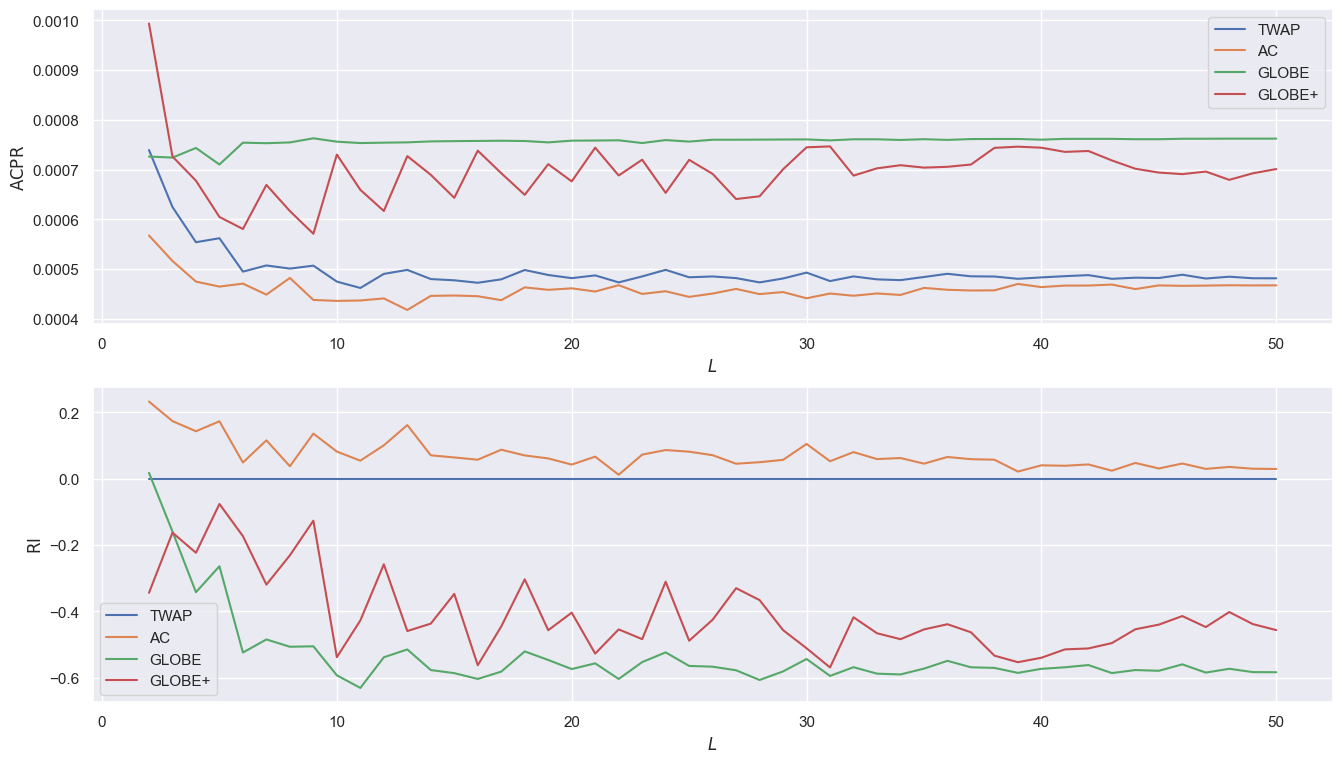

In [3]:
T = 50
W = np.ones(shape=10, dtype=int) * 500

W_max = 501  #only for GLOBE

lamb = 2 * (0.01)
eta = 2 * (0.001)
init_sigma = 0.021713089727230926

start = 2
stop = T
num = 49

skip = 0
rounds_for_est = 15

K = 100000.
instrument = ['USD_CNH_T+1', 'USD_RUB_T+1']
date = [['2022-10-04', '2022-10-12', '2022-10-21', '2022-10-31'],
        ['2022-10-24', '2022-10-31', '2022-11-03', '2022-11-10']]

start_names = []
files = []

for j in range(8):
    files.append((('data_parsing/data/' +
                    instrument[j // 4] + '__' + date[j // 4][j % 4] +
                    '_PQ_' + 'ask.tsv'), ('data_parsing/data/' + instrument[j // 4] +
                    '__' + date[j // 4][j % 4] + '_PQ_' + 'bid.tsv')))
    start_names.append(instrument[j // 4] + ' ' + date[j // 4][j % 4])

path = 'report/fig/'

file_backtest = open('report/backtest.tex','w')

for (file1, file2), start_name in zip(files, start_names):        
    filename = start_name + ' at T = ' + str(T) + ' with W = ' + str(W[0]) + '.pdf'
    LaTeX_caption = f"ACPR and RI metrics for {start_name} at {str(T)} with $W = {str(W[0])}$"
    title = None

    params_GLOBE = {
        'lamb': lamb,
        'eta': eta,
        'init_sigma': init_sigma,
        'W_max': W_max,
        'K': K
    }
    params_GLOBE_plus = {
        'lamb': lamb,
        'eta': eta,
        'init_sigma': init_sigma,
        'W_max': W_max,
        'K': K
    }
    params_AC = {'lamb': lamb, 'eta': eta, 'init_sigma': init_sigma}
    params_TWAP = {}

    default_params = {
        'T': T,
        'W': W,
        'start': start,
        'stop': stop,
        'num': num,
        'skip': skip,
        'rounds_for_est': rounds_for_est,
        'file1': file1,
        'file2': file2,
        'filename': path + filename,
        'title': title
    }
    params = {
        'TWAP': params_TWAP,
        'AC': params_AC,
        'GLOBE': params_GLOBE,
        'GLOBE+': params_GLOBE_plus
    }

    ACPR, RI = misc.calc_and_plot_all_ACPR_RI(**default_params, **params, savefig=True)

    file_backtest.write("\\begin{figure}[htbp]")
    file_backtest.write("\t\\includegraphics[width=\\textwidth]{" + filename + "}")
    file_backtest.write("\t\\caption{" + LaTeX_caption + "}")
    file_backtest.write("\\end{figure}\n")

file_backtest.close()